<a href="https://colab.research.google.com/github/alejoes83/TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd


In [3]:
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

telecomx_data = pd.read_json(url)
telecomx_data.head()
#telecomx_data.info()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
id_churn = pd.concat([telecomx_data['customerID'],telecomx_data['Churn']],axis=1)
id_churn.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [5]:
telecomx_data['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [6]:
telecomx_data.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer,0
phone,0
internet,0
account,0


In [7]:
df_plano = telecomx_data[telecomx_data['Churn'].str.strip() != '']

In [8]:
costumer_data = pd.json_normalize(telecomx_data['customer'])
costumer_data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
5,Female,0,No,Yes,9
6,Female,1,Yes,No,71
7,Male,0,Yes,No,63
8,Female,1,No,No,7
9,Female,0,Yes,Yes,65


In [9]:
costumer_phone = pd.json_normalize(telecomx_data['phone'])
costumer_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [10]:
costumer_internet = pd.json_normalize(telecomx_data['internet'])
costumer_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [11]:
costumer_account = pd.json_normalize(telecomx_data['account'])
costumer_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [12]:
import numpy as np

In [13]:
costumer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [14]:
costumer_columns = list(costumer_data.columns)
costumer_columns

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']

In [15]:
costumer_data[['Dependents', 'Partner']] = costumer_data[['Dependents', 'Partner']].map(lambda x: 1 if x == "Yes" else 0)
costumer_data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,1,1,9
1,Male,0,0,0,9
2,Male,0,0,0,4
3,Male,1,1,0,13
4,Female,1,1,0,3
5,Female,0,0,1,9
6,Female,1,1,0,71
7,Male,0,1,0,63
8,Female,1,0,0,7
9,Female,0,1,1,65


In [16]:
costumer_data[['Dependents', 'Partner']] = costumer_data[['Dependents', 'Partner']].astype(bool)
costumer_data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,True,True,9
1,Male,0,False,False,9
2,Male,0,False,False,4
3,Male,1,True,False,13
4,Female,1,True,False,3
5,Female,0,False,True,9
6,Female,1,True,False,71
7,Male,0,True,False,63
8,Female,1,False,False,7
9,Female,0,True,True,65


In [17]:
costumer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   bool  
 3   Dependents     7267 non-null   bool  
 4   tenure         7267 non-null   int64 
dtypes: bool(2), int64(2), object(1)
memory usage: 184.6+ KB


In [18]:
costumer_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [19]:
phone_columns = list(costumer_phone.columns)
phone_columns


['PhoneService', 'MultipleLines']

In [20]:
costumer_phone['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [21]:
costumer_phone[phone_columns] = costumer_phone[phone_columns].map(lambda x: 1 if x == "Yes" else 0)
costumer_phone[phone_columns] = costumer_phone[phone_columns].replace('No phone service',0)
costumer_phone

,PhoneService,MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0
...,...,...
7262,1,0
7263,1,1
7264,1,0
7265,1,0


In [22]:
costumer_phone[['PhoneService','MultipleLines']] = costumer_phone[['PhoneService','MultipleLines']].astype(bool)
costumer_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   PhoneService   7267 non-null   bool 
 1   MultipleLines  7267 non-null   bool 
dtypes: bool(2)
memory usage: 14.3 KB


In [23]:
costumer_phone.head(10)

,PhoneService,MultipleLines
0,True,False
1,True,True
2,True,False
3,True,False
4,True,False
5,True,False
6,True,False
7,True,True
8,True,False
9,True,True


In [24]:
costumer_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


In [25]:
internet_columns = list(costumer_internet.columns)
internet_columns

['InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [26]:

costumer_internet['OnlineSecurity'].unique()
costumer_internet['OnlineBackup'].unique()
costumer_internet['DeviceProtection'].unique()
costumer_internet['TechSupport'].unique()
costumer_internet['StreamingTV'].unique()
costumer_internet['StreamingMovies'].unique()


array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
costumer_internet[['OnlineSecurity','OnlineBackup',
                   'DeviceProtection','TechSupport',
                   'StreamingTV','StreamingMovies']] = costumer_internet[[
                       'OnlineSecurity','OnlineBackup','DeviceProtection',
                       'TechSupport','StreamingTV','StreamingMovies']].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0}))
costumer_internet.head(10)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,0,1,0,1,1,0
1,DSL,0,0,0,0,0,1
2,Fiber optic,0,0,1,0,0,0
3,Fiber optic,0,1,1,0,1,1
4,Fiber optic,0,0,0,1,1,0
5,DSL,0,0,0,1,1,1
6,Fiber optic,1,1,1,1,1,1
7,Fiber optic,1,0,0,1,0,0
8,DSL,1,0,0,0,0,0
9,DSL,1,1,1,1,1,1


In [28]:
costumer_internet[['OnlineSecurity','OnlineBackup',
                   'DeviceProtection','TechSupport',
                   'StreamingTV','StreamingMovies']] = costumer_internet[[
                       'OnlineSecurity','OnlineBackup','DeviceProtection',
                       'TechSupport','StreamingTV','StreamingMovies']].astype(bool)
costumer_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   bool  
 2   OnlineBackup      7267 non-null   bool  
 3   DeviceProtection  7267 non-null   bool  
 4   TechSupport       7267 non-null   bool  
 5   StreamingTV       7267 non-null   bool  
 6   StreamingMovies   7267 non-null   bool  
dtypes: bool(6), object(1)
memory usage: 99.5+ KB


In [29]:
costumer_internet.head(10)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,False,True,False,True,True,False
1,DSL,False,False,False,False,False,True
2,Fiber optic,False,False,True,False,False,False
3,Fiber optic,False,True,True,False,True,True
4,Fiber optic,False,False,False,True,True,False
5,DSL,False,False,False,True,True,True
6,Fiber optic,True,True,True,True,True,True
7,Fiber optic,True,False,False,True,False,False
8,DSL,True,False,False,False,False,False
9,DSL,True,True,True,True,True,True


In [30]:
costumer_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


In [31]:
account_columns = list(costumer_account.columns)
account_columns
costumer_account.head(10)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
5,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,Two year,Yes,Credit card (automatic),84.65,5377.8
8,Month-to-month,Yes,Electronic check,48.20,340.35
9,Two year,Yes,Mailed check,90.45,5957.9


In [32]:
costumer_account['Contract'].unique()
costumer_account['PaperlessBilling'].unique()
costumer_account['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [33]:
costumer_account['PaperlessBilling']=costumer_account['PaperlessBilling'].replace('Yes',1)
costumer_account['PaperlessBilling']=costumer_account['PaperlessBilling'].replace('No',0)
costumer_account.head(10)

/tmp/ipython-input-33-942655992.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  costumer_account['PaperlessBilling']=costumer_account['PaperlessBilling'].replace('No',0)


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,1,Mailed check,65.60,593.3
1,Month-to-month,0,Mailed check,59.90,542.4
2,Month-to-month,1,Electronic check,73.90,280.85
3,Month-to-month,1,Electronic check,98.00,1237.85
4,Month-to-month,1,Mailed check,83.90,267.4
5,Month-to-month,1,Credit card (automatic),69.40,571.45
6,Two year,1,Bank transfer (automatic),109.70,7904.25
7,Two year,1,Credit card (automatic),84.65,5377.8
8,Month-to-month,1,Electronic check,48.20,340.35
9,Two year,1,Mailed check,90.45,5957.9


In [34]:
costumer_account['PaperlessBilling']=costumer_account['PaperlessBilling'].fillna(0).astype(bool)
costumer_account.info()
costumer_account.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   bool   
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: bool(1), float64(1), object(3)
memory usage: 234.3+ KB


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,True,Mailed check,65.60,593.3
1,Month-to-month,False,Mailed check,59.90,542.4
2,Month-to-month,True,Electronic check,73.90,280.85
3,Month-to-month,True,Electronic check,98.00,1237.85
4,Month-to-month,True,Mailed check,83.90,267.4
5,Month-to-month,True,Credit card (automatic),69.40,571.45
6,Two year,True,Bank transfer (automatic),109.70,7904.25
7,Two year,True,Credit card (automatic),84.65,5377.8
8,Month-to-month,True,Electronic check,48.20,340.35
9,Two year,True,Mailed check,90.45,5957.9


In [35]:
costumer_account['Charges.Total'] = costumer_account['Charges.Total'].str.replace(r'[$,]', '', regex=True).replace(' ', '0').fillna(0).astype(float)
costumer_account.head(10)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,True,Mailed check,65.60,593.30
1,Month-to-month,False,Mailed check,59.90,542.40
2,Month-to-month,True,Electronic check,73.90,280.85
3,Month-to-month,True,Electronic check,98.00,1237.85
4,Month-to-month,True,Mailed check,83.90,267.40
5,Month-to-month,True,Credit card (automatic),69.40,571.45
6,Two year,True,Bank transfer (automatic),109.70,7904.25
7,Two year,True,Credit card (automatic),84.65,5377.80
8,Month-to-month,True,Electronic check,48.20,340.35
9,Two year,True,Mailed check,90.45,5957.90


In [36]:
costumer_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   bool   
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   float64
dtypes: bool(1), float64(2), object(2)
memory usage: 234.3+ KB


In [37]:
id_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [38]:
id_churn['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [39]:
id_churn['Churn']=id_churn['Churn'].replace('Yes',1)
id_churn['Churn']=id_churn['Churn'].replace('No',0).fillna(0).astype(bool)
id_churn.head(10)

,customerID,Churn
0,0002-ORFBO,False
1,0003-MKNFE,False
2,0004-TLHLJ,True
3,0011-IGKFF,True
4,0013-EXCHZ,True
5,0013-MHZWF,False
6,0013-SMEOE,False
7,0014-BMAQU,False
8,0015-UOCOJ,False
9,0016-QLJIS,False


In [40]:
costumer_account['charges.daily']= (costumer_account['Charges.Monthly']/30).round(2)
costumer_account.head(10)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,charges.daily
0,One year,True,Mailed check,65.60,593.30,2.19
1,Month-to-month,False,Mailed check,59.90,542.40,2.00
2,Month-to-month,True,Electronic check,73.90,280.85,2.46
3,Month-to-month,True,Electronic check,98.00,1237.85,3.27
4,Month-to-month,True,Mailed check,83.90,267.40,2.80
5,Month-to-month,True,Credit card (automatic),69.40,571.45,2.31
6,Two year,True,Bank transfer (automatic),109.70,7904.25,3.66
7,Two year,True,Credit card (automatic),84.65,5377.80,2.82
8,Month-to-month,True,Electronic check,48.20,340.35,1.61
9,Two year,True,Mailed check,90.45,5957.90,3.02


#📊 Carga y análisis

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
telecomx_final = pd.concat([id_churn,costumer_data,costumer_phone,costumer_internet,costumer_account],axis=1)
telecomx_final.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,charges.daily
807,1140-UKVZG,False,Female,0,False,False,17,True,True,No,...,False,False,False,False,Month-to-month,False,Mailed check,24.80,475.25,0.83
6813,9392-XBGTD,False,Male,0,False,True,27,True,False,No,...,False,False,False,False,Two year,False,Mailed check,20.60,581.85,0.69
1978,2805-AUFQN,False,Female,0,False,False,25,True,False,No,...,False,False,False,False,Two year,False,Credit card (automatic),19.80,475.20,0.66
7182,9874-QLCLH,True,Female,0,True,True,17,True,True,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,104.20,1743.50,3.47
1355,1960-UOTYM,False,Male,0,True,True,52,True,False,DSL,...,True,False,True,True,Two year,False,Electronic check,79.20,4016.30,2.64
4781,6549-YMFAW,False,Male,1,True,False,9,True,False,No,...,False,False,False,False,Month-to-month,True,Mailed check,21.25,204.55,0.71
6923,9537-VHDTA,False,Female,0,False,True,1,True,False,DSL,...,False,False,False,False,Month-to-month,False,Mailed check,51.20,51.20,1.71
60,0103-CSITQ,False,Female,0,True,False,57,True,True,Fiber optic,...,True,True,True,True,One year,True,Bank transfer (automatic),109.40,6252.70,3.65
6183,8468-FZTOE,False,Female,0,True,True,72,True,False,DSL,...,True,True,False,True,Two year,True,Electronic check,74.35,5237.40,2.48
5976,8167-GJLRN,False,Male,0,False,False,3,False,False,DSL,...,False,True,False,False,Month-to-month,False,Electronic check,30.40,82.15,1.01


In [43]:
telecomx_final.to_csv('/content/drive/MyDrive/e-learning/Alura ONE/Data science/Telecomx/Telecomx_final.csv', index=False)

In [44]:
telecomx_final.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,charges.daily
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157292
std,0.369074,24.571773,30.129572,2268.648587,1.004407
min,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,9.000000,35.425000,396.200000,1.180000
50%,0.000000,29.000000,70.300000,1389.200000,2.340000
75%,0.000000,55.000000,89.875000,3778.525000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.960000


In [45]:

churn_count = telecomx_final['Churn'].value_counts()
churn_count.describe()

,count
count,2.000000
mean,3633.500000
std,2495.379831
min,1869.000000
25%,2751.250000
50%,3633.500000
75%,4515.750000
max,5398.000000


/tmp/ipython-input-46-1146562789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_count.index,y=churn_count.values,palette=["green", "red"],legend=False)


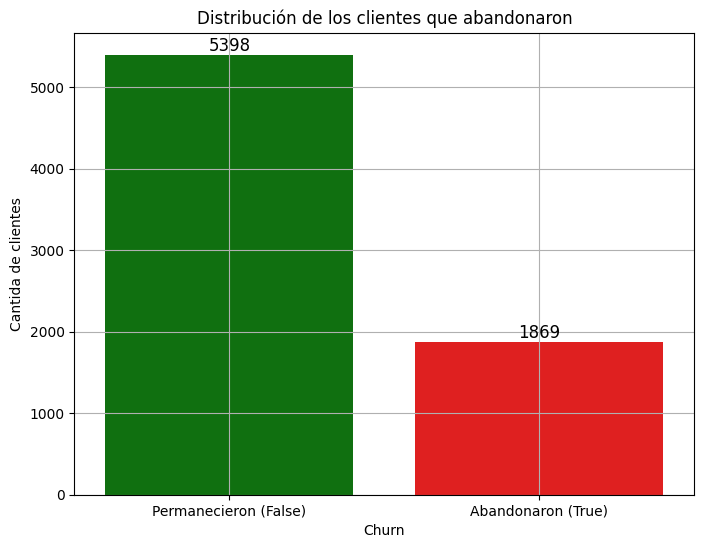

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_count.index,y=churn_count.values,palette=["green", "red"],legend=False)
plt.xticks([0, 1], ['Permanecieron (False)', 'Abandonaron (True)'])
plt.ylabel('Cantida de clientes')
plt.title('Distribución de los clientes que abandonaron')
for i, count in enumerate(churn_count.values):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)
plt.grid(True)

plt.show()

In [47]:
hombres_count = telecomx_final[telecomx_final['gender'] == 'Male']['Churn'].value_counts()
mujeres_count = telecomx_final[telecomx_final['gender'] == 'Female']['Churn'].value_counts()
mujeres_count

,count
Churn,
False,2653
True,939


In [48]:
hombres_count

,count
Churn,
False,2745
True,930


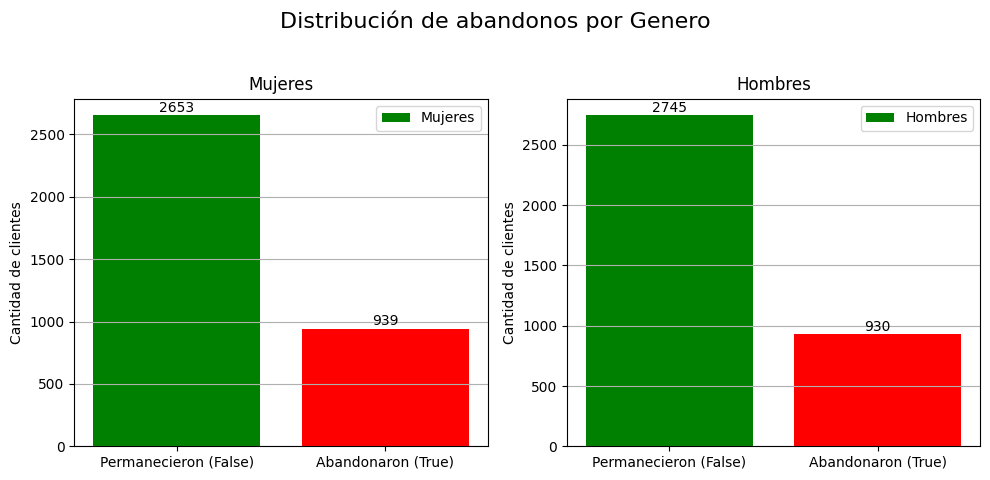

In [49]:
fig, axs =plt.subplots(1,2, figsize=(10,5))


plt.suptitle('Distribución de abandonos por Genero', fontsize=16)

axs[0].bar(mujeres_count.index, mujeres_count.values, color=['green','red'], label='Mujeres')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Permanecieron (False)', 'Abandonaron (True)'])
axs[0].set_ylabel('Cantidad de clientes')
axs[0].set_title('Mujeres')
axs[0].legend()
axs[0].grid(True,axis='y')
for i, count in enumerate(mujeres_count.values):
    axs[0].text(i, count + 30, str(count), ha='center', fontsize=10)

axs[1].bar(hombres_count.index, hombres_count.values, color=['green','red'], label='Hombres')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Permanecieron (False)', 'Abandonaron (True)'])
axs[1].set_ylabel('Cantidad de clientes')
axs[1].set_title('Hombres')
axs[1].legend()
axs[1].grid(True,axis='y')
for i, count in enumerate(hombres_count.values):
    axs[1].text(i, count + 30, str(count), ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [50]:
un_año = telecomx_final[telecomx_final['Contract'] == 'One year']['Churn'].value_counts()
dos_años = telecomx_final[telecomx_final['Contract'] == 'Two year']['Churn'].value_counts()
mes_mes = telecomx_final[telecomx_final['Contract'] == 'Month-to-month']['Churn'].value_counts()
un_año

,count
Churn,
False,1353
True,166


In [51]:
dos_años

,count
Churn,
False,1695
True,48


In [52]:
mes_mes

,count
Churn,
False,2350
True,1655


In [53]:
contract_churn_total = pd.concat([un_año, dos_años, mes_mes])
contract_churn_total

,count
Churn,
False,1353
True,166
False,1695
True,48
False,2350
True,1655


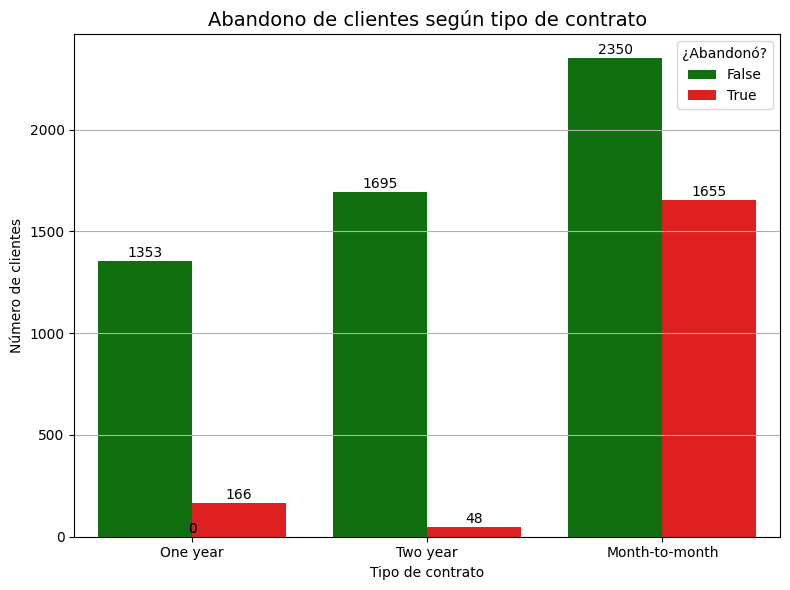

In [54]:
contract_churn_total = pd.DataFrame(contract_churn_total).reset_index()
contract_churn_total.columns = ['Churn', 'Cantidad']
contract_churn_total['Contrato'] = ['One year', 'One year', 'Two year', 'Two year', 'Month-to-month', 'Month-to-month']

plt.figure(figsize=(8,6))
ax=sns.barplot(data=contract_churn_total, x='Contrato', y='Cantidad', hue='Churn', palette=['green', 'red'])

plt.title('Abandono de clientes según tipo de contrato',fontsize=14)
plt.ylabel('Número de clientes')
plt.xlabel('Tipo de contrato')
plt.legend(title='¿Abandonó?')
plt.grid(True, axis='y')

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}',
                (p.get_x() + p.get_width() / 2, altura + 5),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

In [55]:
senior_count = telecomx_final[telecomx_final['SeniorCitizen'] == 1]['Churn'].value_counts()
no_senior_count = telecomx_final[telecomx_final['SeniorCitizen'] == 0]['Churn'].value_counts()
senior_count


,count
Churn,
False,706
True,476


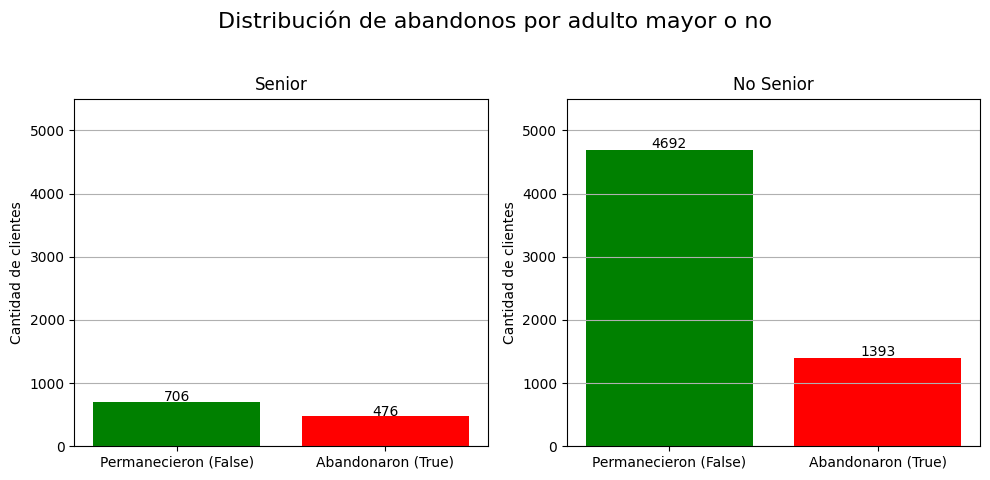

In [56]:
fig, axs =plt.subplots(1,2, figsize=(10,5))


plt.suptitle('Distribución de abandonos por adulto mayor o no', fontsize=16)

axs[0].bar(senior_count.index, senior_count.values, color=['green','red'])
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Permanecieron (False)', 'Abandonaron (True)'])
axs[0].set_ylabel('Cantidad de clientes')
axs[0].set_title('Senior')

axs[0].grid(True, axis='y')

for i, count in enumerate(senior_count.values):
    axs[0].text(i, count + 10, str(count), ha='center', fontsize=10)

axs[1].bar(no_senior_count.index, no_senior_count.values, color=['green','red'])
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Permanecieron (False)', 'Abandonaron (True)'])
axs[1].set_ylabel('Cantidad de clientes')
axs[1].set_title('No Senior')

axs[1].grid(True, axis='y')
ymin = 0
ymax = 5500
for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)
for i, count in enumerate(no_senior_count.values):
    axs[1].text(i, count + 30, str(count), ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [57]:
telecomx_final['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [58]:
telecomx_final['InternetService'] = telecomx_final['InternetService'].replace('No', 'No internet service')
telecomx_final['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No internet service'], dtype=object)

In [59]:
dsl_count = telecomx_final[telecomx_final['InternetService'] == 'DSL']['Churn'].value_counts()
fiber_count = telecomx_final[telecomx_final['InternetService'] == 'Fiber optic']['Churn'].value_counts()
no_internet_count = telecomx_final[telecomx_final['InternetService'] == 'No internet service']['Churn'].value_counts()
dsl_count

,count
Churn,
False,2029
True,459


In [60]:
fiber_count

,count
Churn,
False,1901
True,1297


In [61]:
no_internet_count

,count
Churn,
False,1468
True,113


In [62]:
service_churn_total = pd.concat([dsl_count, fiber_count, no_internet_count])
service_churn_total

,count
Churn,
False,2029
True,459
False,1901
True,1297
False,1468
True,113


In [63]:
service_churn_total = pd.DataFrame(service_churn_total).reset_index()
service_churn_total.columns = ['Churn', 'Cantidad']
service_churn_total['Servicio'] = ['DSL', 'DSL', 'Fiber optic', 'Fiber optic', 'No internet', 'No internet']
service_churn_total

,Churn,Cantidad,Servicio
0,False,2029,DSL
1,True,459,DSL
2,False,1901,Fiber optic
3,True,1297,Fiber optic
4,False,1468,No internet
5,True,113,No internet


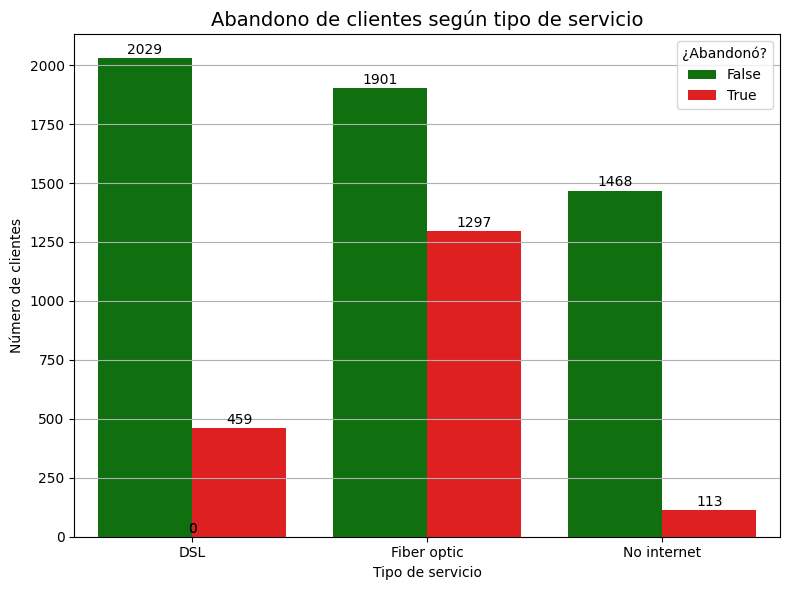

In [64]:


plt.figure(figsize=(8,6))
ax=sns.barplot(data=service_churn_total, x='Servicio', y='Cantidad', hue='Churn', palette=['green', 'red'])

plt.title('Abandono de clientes según tipo de servicio',fontsize=14)
plt.ylabel('Número de clientes')
plt.xlabel('Tipo de servicio')
plt.legend(title='¿Abandonó?')
plt.grid(True, axis='y')

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}',
                (p.get_x() + p.get_width() / 2, altura + 5),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

/tmp/ipython-input-65-845855966.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=telecomx_final, x='Churn', y='tenure', palette=['green', 'red'])


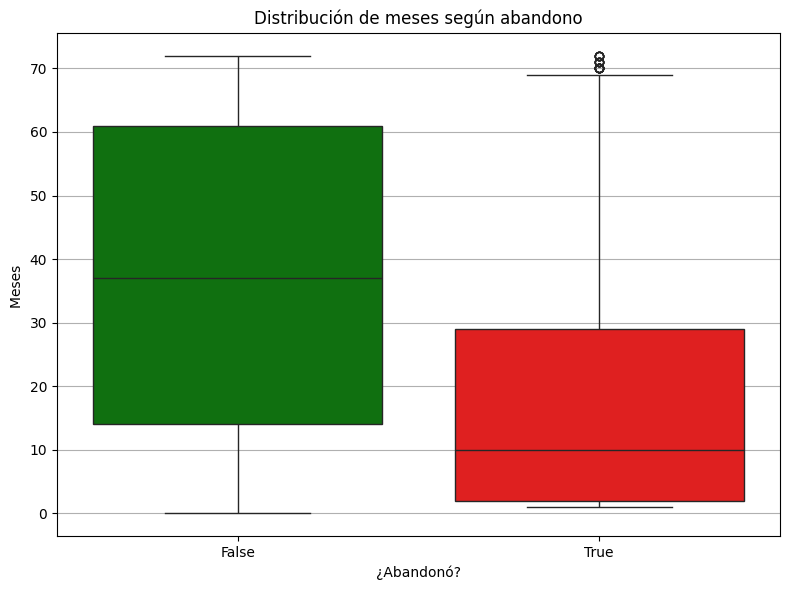

In [65]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=telecomx_final, x='Churn', y='tenure', palette=['green', 'red'])

plt.title('Distribución de meses según abandono')
plt.xlabel('¿Abandonó?')
plt.ylabel('Meses ')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

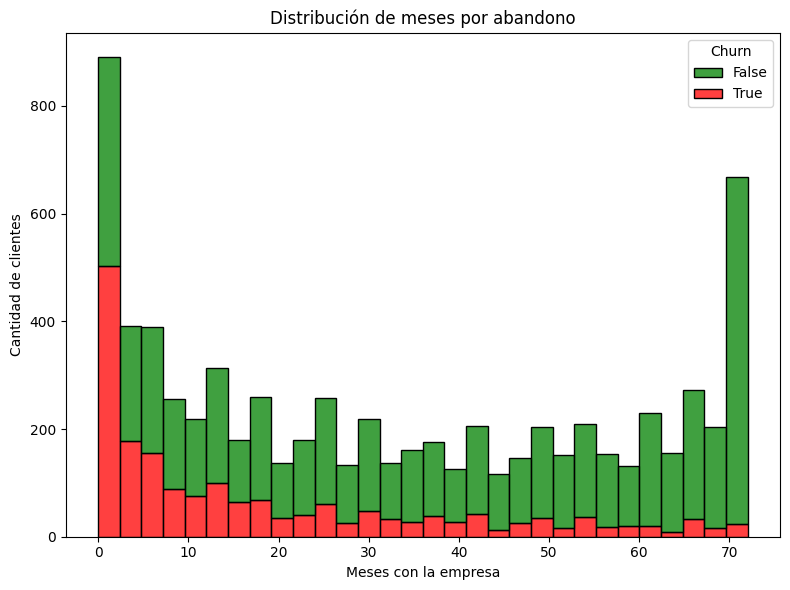

In [66]:
plt.figure(figsize=(8, 6))
sns.histplot(data=telecomx_final, x='tenure', hue='Churn', multiple='stack', palette=['green', 'red'], bins=30)

plt.title('Distribución de meses por abandono')
plt.xlabel('Meses con la empresa')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()

In [67]:
import plotly.express as px
fig = px.histogram(telecomx_final, x='tenure', color='Churn', barmode='overlay',
                   histnorm='percent',
                   title='Distribución porcentual de permanencia según abandono',
                   labels={'Tenure': 'Meses de permanencia', 'Churn': '¿Abandonó?'})

fig.update_traces(opacity=0.6)
fig.show()


In [68]:
gastado_churntrue = telecomx_final[telecomx_final['Churn'] == True]['Charges.Total']
gastado_churnfalse = telecomx_final[telecomx_final['Churn'] == False]['Charges.Total']
tiempoContrato_false = telecomx_final[telecomx_final['Churn'] == False]['tenure']
tiempoContrato_true = telecomx_final[telecomx_final['Churn'] == True]['tenure']


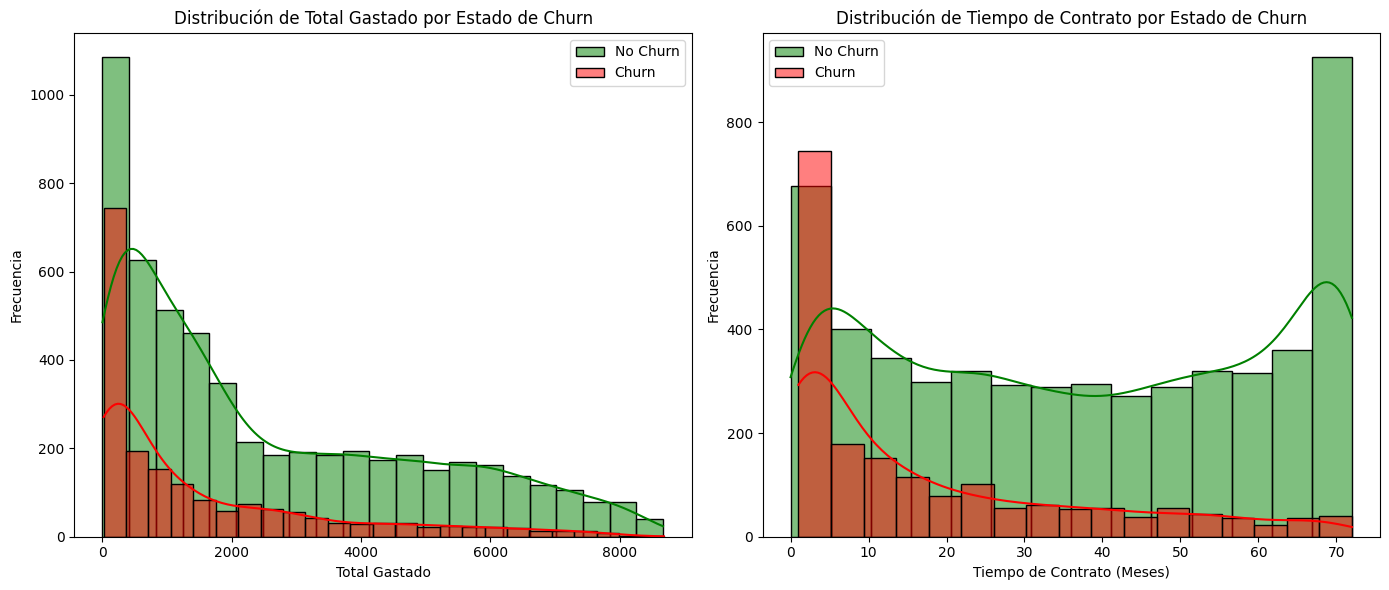

In [69]:

plt.figure(figsize=(14, 6))

# Total Gastado
plt.subplot(1, 2, 1)
sns.histplot(gastado_churnfalse, color='green', label='No Churn', kde=True)
sns.histplot(gastado_churntrue, color='red', label='Churn', kde=True)
plt.title('Distribución de Total Gastado por Estado de Churn')
plt.xlabel('Total Gastado')
plt.ylabel('Frecuencia')
plt.legend()

# Tiempo de Contrato
plt.subplot(1, 2, 2)
sns.histplot(tiempoContrato_false, color='green', label='No Churn', kde=True)
sns.histplot(tiempoContrato_true, color='red', label='Churn', kde=True)
plt.title('Distribución de Tiempo de Contrato por Estado de Churn')
plt.xlabel('Tiempo de Contrato (Meses)')
plt.ylabel('Frecuencia')
plt.legend()


plt.tight_layout()
plt.show()

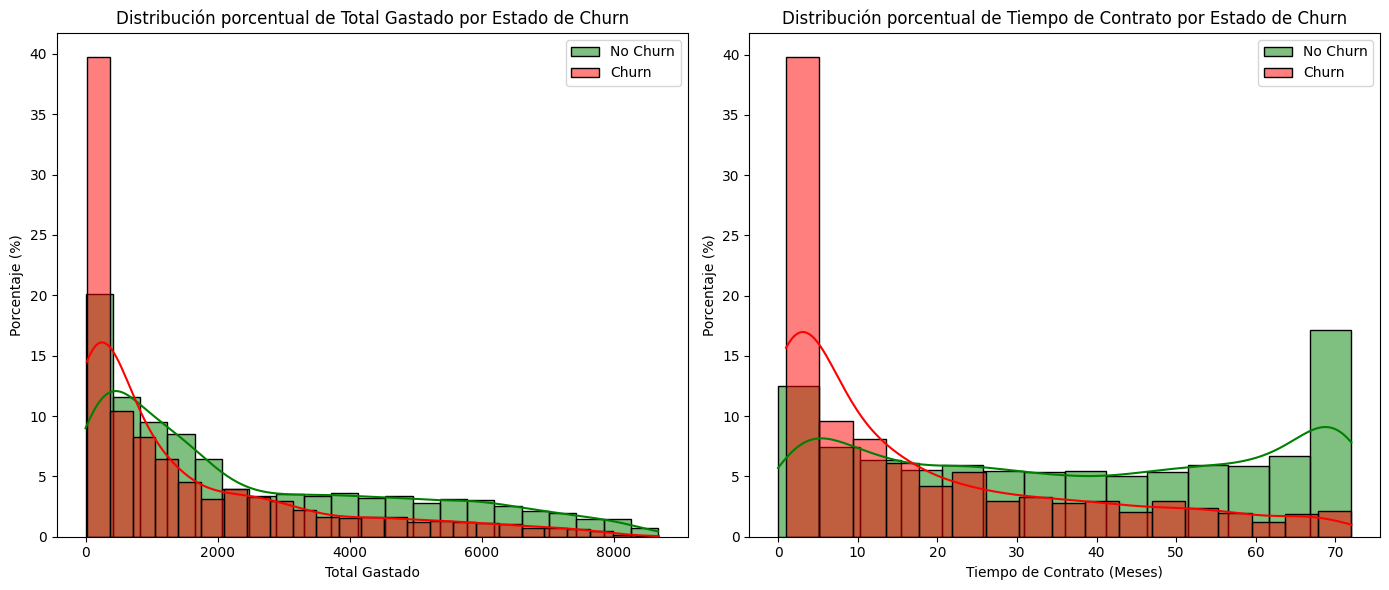

In [70]:
plt.figure(figsize=(14, 6))

# Total Gastado - porcentajes
plt.subplot(1, 2, 1)
sns.histplot(gastado_churnfalse, color='green', label='No Churn', kde=True, stat='percent')
sns.histplot(gastado_churntrue, color='red', label='Churn', kde=True, stat='percent')
plt.title('Distribución porcentual de Total Gastado por Estado de Churn')
plt.xlabel('Total Gastado')
plt.ylabel('Porcentaje (%)')
plt.legend()

# Tiempo de Contrato - porcentajes
plt.subplot(1, 2, 2)
sns.histplot(tiempoContrato_false, color='green', label='No Churn', kde=True, stat='percent')
sns.histplot(tiempoContrato_true, color='red', label='Churn', kde=True, stat='percent')
plt.title('Distribución porcentual de Tiempo de Contrato por Estado de Churn')
plt.xlabel('Tiempo de Contrato (Meses)')
plt.ylabel('Porcentaje (%)')
plt.legend()

plt.tight_layout()
plt.show()


#📄Informe final

#**INFORME PARA TELECOMX**

En este informe se describiran los pasos seguidos para realizar la transformación y el analaisis de los datos entregados en formato .json.

##1.Repositorio y extracción de información.
Creamos un repositorio nuevo para el acceso a este analisis en github con la dirección https://github.com/alejoes83/TelecomX

La fuente de los datos es: https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json


##2.Lectura y transformación de datos
- primero se convirtio el formato original a .csv para poder normalizar y trabajar diferentes data frames. Se verificaron la integridad de los datos y si habian espacios en blanco, fue necesario eliminar varias filas porque en la columna **churn** que es la mas importante para este analisis habia varios campos vacios.
- En los campos con datos categoricos 'Yes' y 'No' se convirtieron a formato bool con datos True y False por practicidad al momento de graficar y analizar la información.
- para columna 'charges.total' se convirtio a formato entero para poder realizar los calculos correspondientes.
- Al momento de generar el data frame de servicios de internet se enccontro un dato ambiguo 'No' se asume que no tiene servicio de internet se remplazo por 'No internet'.
- Se generaron todos los data frames para el analisis.
- Se concatenaron todos los data frames en uno solo y se exportó con formato .scv.

##3. Alalisis categorico con respecto al Churn
- Se sacaron los datos estadisticos de el dataframe final, donde se obtuvo promedios de los datos nuemricos del dataframe como la cantidad de meses contratados y los pagos realizados, un dato relevantes es el promedio de 32 meses de permanencia de los clientes.
- Se tiene un abandono de al rededor del 26% con respecto al total de usuarios.
- Empezamos a disgregar y profundizar mas en estudio de los datos y encontramos que:
1. por **genero** no es significativa la diferencia por que la afiliacion de las mujeres es practicamente el 50% y con relación a los hombres existe solo una fiderencia de 9 usuarios más en las mujeres que abandonaron.
2. Por **tipo de contrato** si encontramos diferencias signifocativas, los clientes que menos abandonan son los que optan por contratos a largo plazo especificamente de 2 años y tambien de un año pero en los contratos mes a mes se el mayor indice de abandono.
3. En la categoria por edades solo tenemos los rango de mayore de 65 y menores de 65, el grupode los mayores de 65 es mucho menor pero notamos que tiene una mayor incidencia de abandonos cercanoa al 40% y en el grupo de los menores de 65 la incidencia de abando es cercano al 23%.
4. Al analizar la categoria del tipo de servicio de internet sorprende ver que en ele grupo de los usuarios que usan fibra óptica el indice de abandono es cercanoa al 41% y se encuentran menos abandonos en el grupo de los que no tienen conexión a internet.

##4. Analisis númerico con respecto al churn
- Se usaron los datos del tiempo de permanencia y los costos de los usuarios a lo largo del tiempo de afiliación.
1. Analizando los retiros de acuerdo al tiempo de afiliación encontramos que la media de retiro es de 10 meses de permanencia. Y un maximo de 29 meses.
2. Con el histograma notamos que en le primer mes mas del 50% de los afiliados se retiran, esta tendencia va disminuyendo a medida que aumenta el tiempo.
3. de acuerdo al gasto la tendencia es que los que se retiran mas rapido gastan menos que los que se mantienen afiliados a travez de l tiempo.

##5. Conclusiones

- Los cleintes con contratos mensuales y menos servicios tienen la mayor tendencia a retirarse, con estos datos se podrian gestionar estrategias de retencion de clientes en los primero meses.
- Los clientes que optan por menos servicios entran ene nel grupod e los clientes de menos permanencia.
- uno de los objetivos debe ser estimular clientes nuevos y clientes con contratos mes a mes para optar por contratos a un o dos años, birndando beneficios extras en este tipo de contratos.


